In [4]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# load image from images directory
images = [
    "../img/kucing.jpg",
    "../img/gradient.png",
    "../img/Penguins.jpg",
    "../img/arizona.jpg",
    "../img/Tulips.jpg",
    "../img/Koala.jpg",
]

# Set up the subplot grid
rows = len(images)
cols = 4

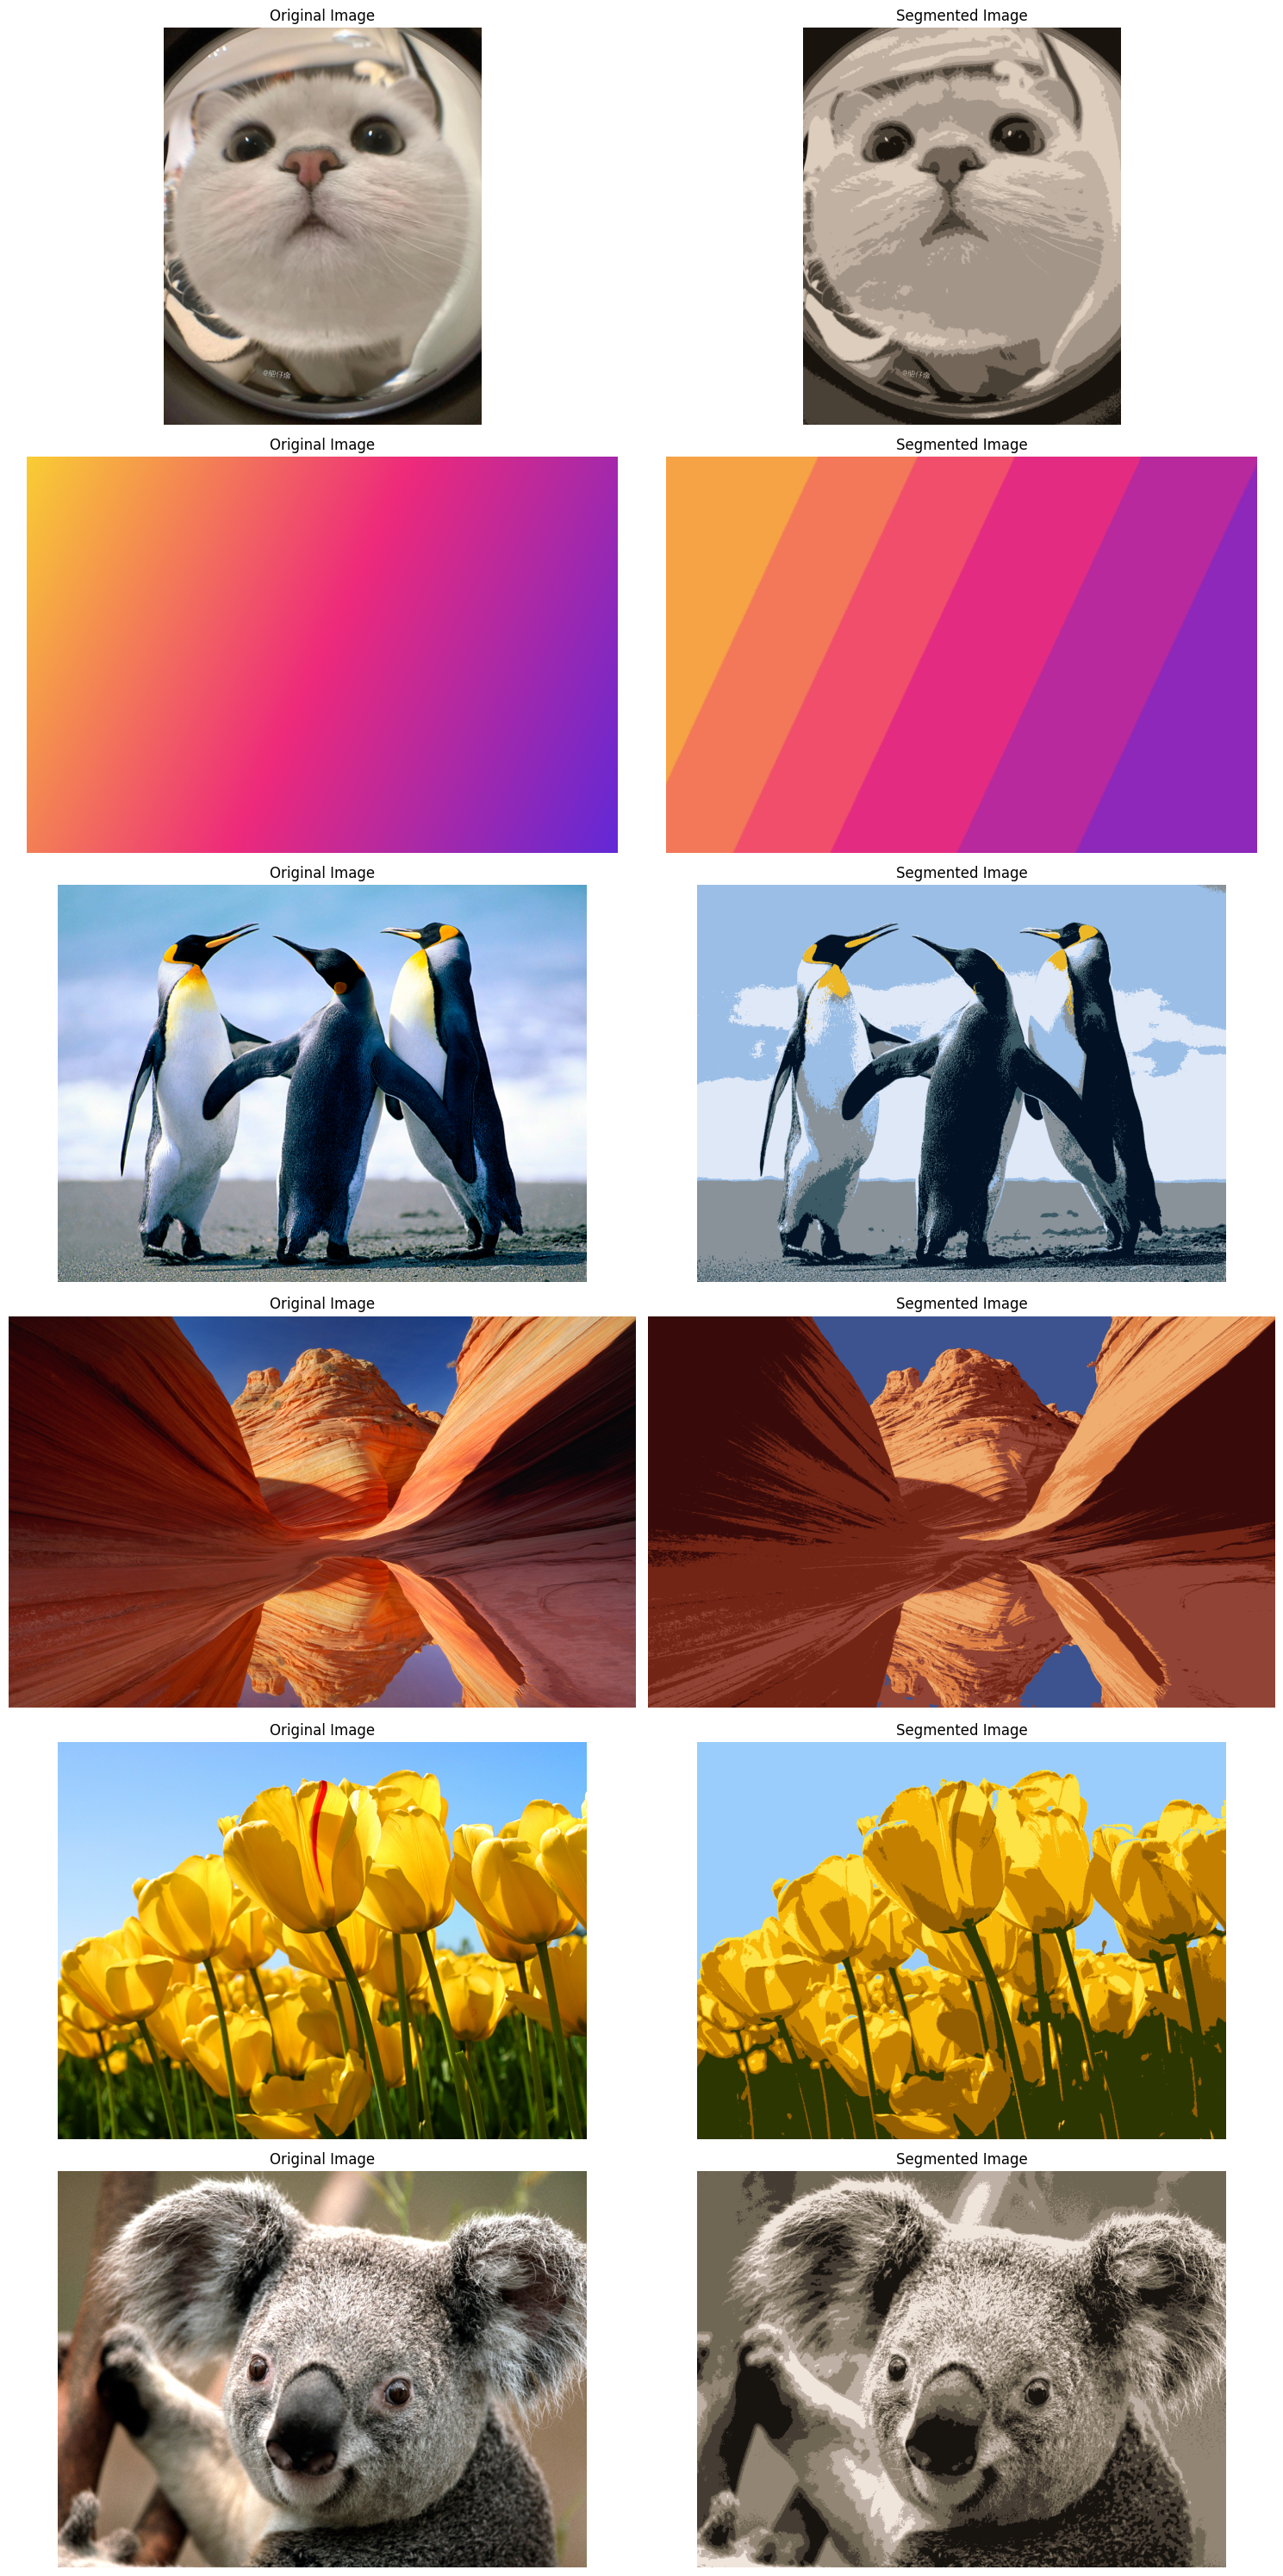

In [6]:
# Create a subplot for each image
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))

# Loop through each image
for i, imgFilename in enumerate(images):
    # Membaca data Image
    oriImg = cv2.imread(imgFilename)

    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Membaca data Image
    img = cv2.imread(imgFilename)

    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixels = img.reshape((-1, 3))  # numpy reshape operation -1 unspecified

    # Apply ISODATA clustering (K-Means with dynamic cluster adaptation)
    def isodata_clustering(data, max_clusters, min_samples=5, max_iter=100):
        kmeans = KMeans(n_clusters=max_clusters, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_

        for _ in range(max_iter):
            cluster_sizes = np.bincount(labels)
            mask = cluster_sizes > min_samples
            if mask.sum() == 0:
                break

            kmeans = KMeans(n_clusters=mask.sum(), random_state=42, init=centers[mask])
            kmeans.fit(data)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_

        return labels, centers

    # Apply ISODATA clustering
    num_clusters = 6  # Adjust the number of clusters as needed
    isodata_labels, isodata_centers = isodata_clustering(pixels, num_clusters)

    # Replace each pixel with its corresponding cluster center
    segmented_image = isodata_centers[isodata_labels].reshape(img.shape)

    titles = [
        "Segmented Image",
    ]

    segmented_image = [segmented_image]

    for j in range(len(titles)):
        # Display the image
        axes[i, j + 1].imshow(
            cv2.cvtColor(segmented_image[j].astype(np.uint8), cv2.COLOR_RGB2BGR),
        )
        axes[i, j + 1].set_title(f"{titles[j]}")
        axes[i, j + 1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()